# Tips Data Analysis Multivariant

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [99]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [100]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [101]:
tips['total_bill']=tips['total_bill'].round().astype('int')
tips['tip']=tips['tip'].round().astype('int')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,17,1,Female,No,Sun,Dinner,2
1,10,2,Male,No,Sun,Dinner,3
2,21,4,Male,No,Sun,Dinner,3
3,24,3,Male,No,Sun,Dinner,2
4,25,4,Female,No,Sun,Dinner,4


In [102]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [103]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.774590,3.004098,2.569672
std,8.889954,1.406914,0.951100
min,3.000000,1.000000,1.000000
25%,13.000000,2.000000,2.000000
50%,18.000000,3.000000,2.000000
75%,24.000000,4.000000,3.000000
max,51.000000,10.000000,6.000000


# Now EDA Multivariant and Bivariant

### 1. Scatterplot(Numerical-Numerical)

In [104]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [105]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,17,1,Female,No,Sun,Dinner,2


<Axes: xlabel='tip', ylabel='total_bill'>

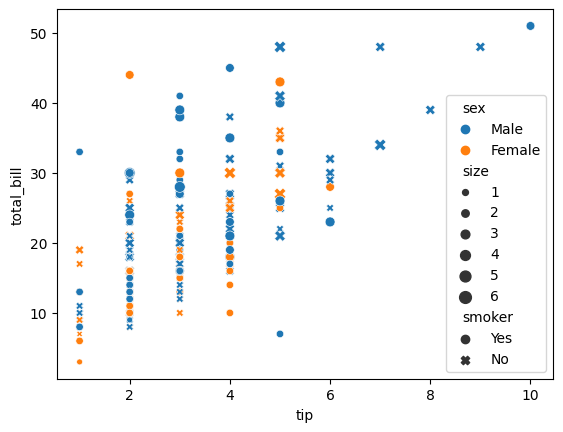

In [106]:
sns.scatterplot(data=tips, y='total_bill', x='tip', hue='sex', style='smoker', size='size')

In [107]:
symbol_map = {'Yes': 'circle', 'No': 'square'}
traces = []
for sex in tips['sex'].unique():
    for smoker in tips['smoker'].unique():
        filtered_data = tips[(tips['sex'] == sex) & (tips['smoker'] == smoker)]
        trace = go.Scatter(
            x=filtered_data['tip'],
            y=filtered_data['total_bill'],
            mode='markers',
            name=f"{sex} - {smoker}",
            marker=dict(
                symbol=symbol_map[smoker], 
                size=filtered_data['size']*10
            )
        )
        traces.append(trace)
layout = go.Layout(
    title='Total Bill vs Tip',
    xaxis=dict(title='Tip'),
    yaxis=dict(title='Total Bill'),
    showlegend=True
)
fig = go.Figure(data=traces, layout=layout)
fig.show()

### Barplot(Numerical-Categorical)

<Axes: xlabel='tip', ylabel='total_bill'>

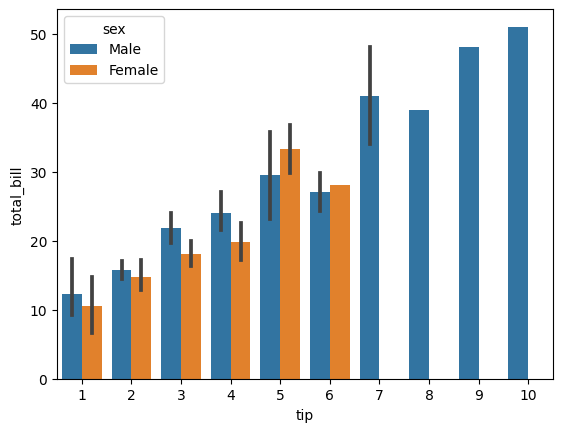

In [108]:
sns.barplot(data= tips, x='tip',y='total_bill', hue='sex')

without sex column

In [109]:
trace = go.Bar(
    x=tips['total_bill'],
    y=tips['tip'],
    marker=dict(color='blue') 
)
layout = go.Layout(
    title='Total Bill vs Tip Amount',
    xaxis=dict(title='Total Bill'),
    yaxis=dict(title='Tip')
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()


### Box Plot (Numerical- Categorical)

<Axes: xlabel='total_bill', ylabel='tip'>

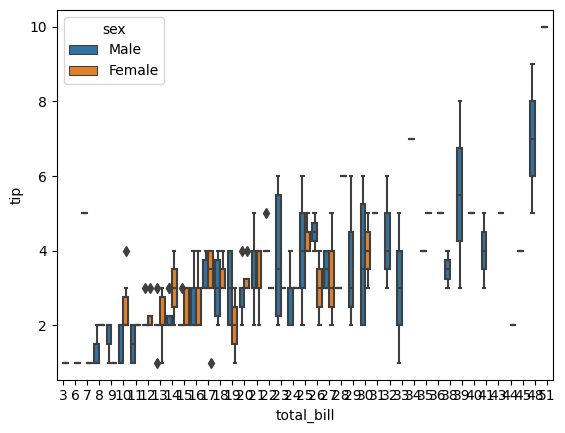

In [110]:
sns.boxplot(data=tips, x='total_bill', y='tip',hue='sex')

In [111]:
#without sex column
trace = go.Box(
    x=tips['total_bill'], 
    y=tips['tip'],         
    marker=dict(color='red'), 
    boxmean=True           
)

layout = go.Layout(
    title='Tip Amount vs Total Bill',
    xaxis=dict(title='Total Bill'),
    yaxis=dict(title='Tip Amount')
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

### KDEplot (Numerical - Categorical)

In [112]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,17,1,Female,No,Sun,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

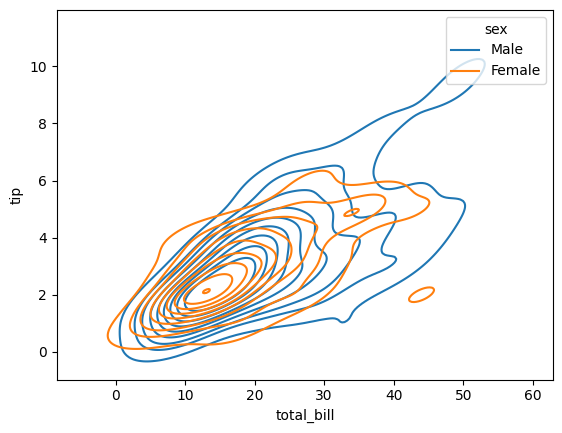

In [113]:
sns.kdeplot(data=tips, x='total_bill', y='tip',hue='sex')

### 5. HeatMap(Categorical-Categorical)

In [114]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,17,1,Female,No,Sun,Dinner,2
1,10,2,Male,No,Sun,Dinner,3


In [115]:
pd.crosstab(tips['tip'], tips['size'])


size,1,2,3,4,5,6
tip,,,,,,
1,2,14,1,0,0,0
2,2,71,10,7,1,0
3,0,45,11,7,1,0
4,0,20,11,9,0,1
5,0,4,2,8,3,2
6,0,2,2,3,0,0
7,0,0,0,1,0,1
8,0,0,0,1,0,0
9,0,0,0,1,0,0


<Axes: xlabel='size', ylabel='tip'>

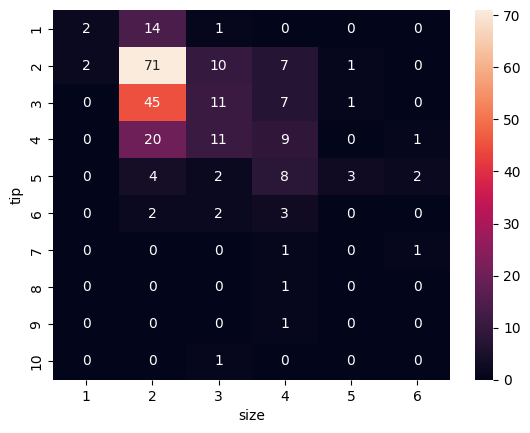

In [116]:
sns.heatmap(pd.crosstab(tips['tip'], tips['size']), annot=True)

In [117]:
cross_tab = pd.crosstab(tips['tip'], tips['size'])
trace = go.Heatmap(
    z=cross_tab.values,      
    x=cross_tab.columns,       
    y=cross_tab.index,         
    colorscale='Viridis',      
    colorbar=dict(title='Count'), 
    hoverongaps=False,         
    hoverinfo='z'
               
)
layout = go.Layout(
    title='Tip vs Size Heatmap',
    xaxis=dict(title='Size'),
    yaxis=dict(title='Tip'),
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()


### 6. ClusterMap(Categorical-Categorical)

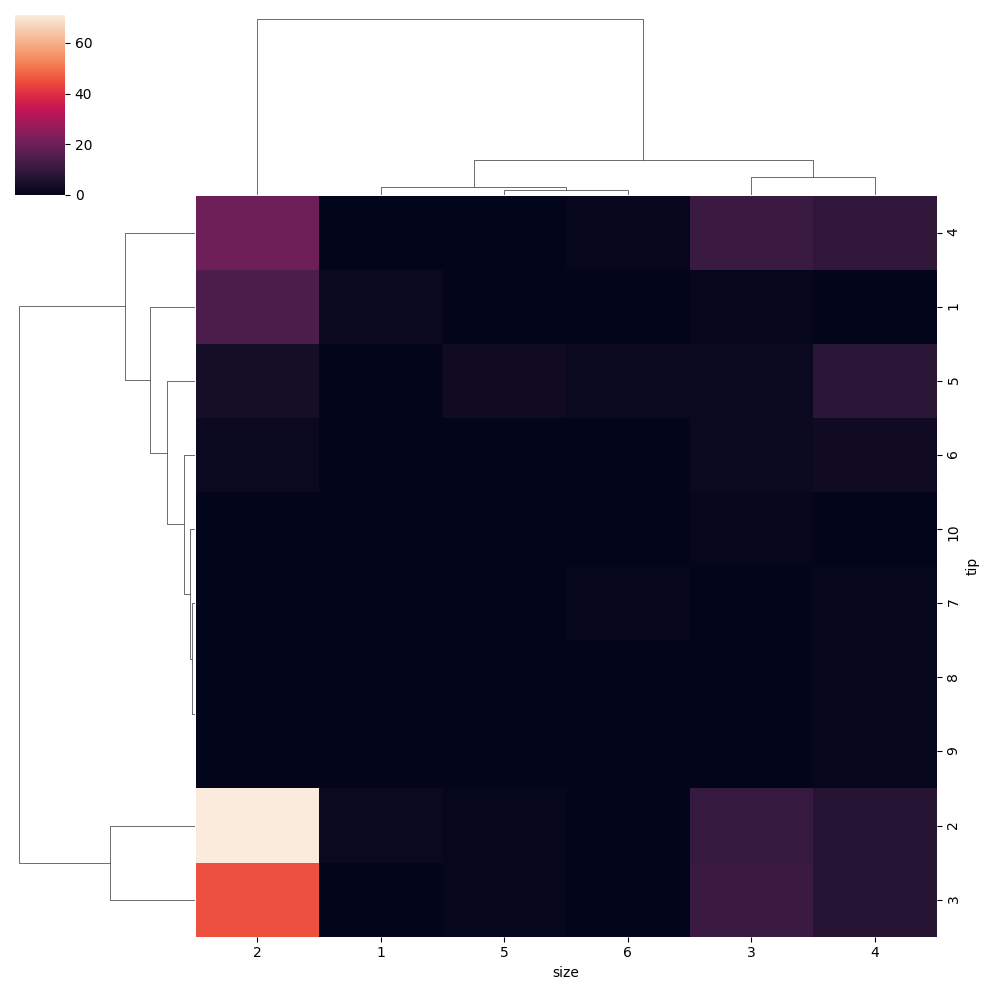

In [118]:
sns.clustermap(pd.crosstab(tips['tip'], tips['size']))

In [119]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
147,12,2,Female,No,Thur,Lunch,2
14,15,3,Female,No,Sun,Dinner,2
107,25,4,Male,Yes,Sat,Dinner,2
237,33,1,Male,Yes,Sat,Dinner,2
181,23,6,Male,Yes,Sun,Dinner,2


### 7. Pairplot

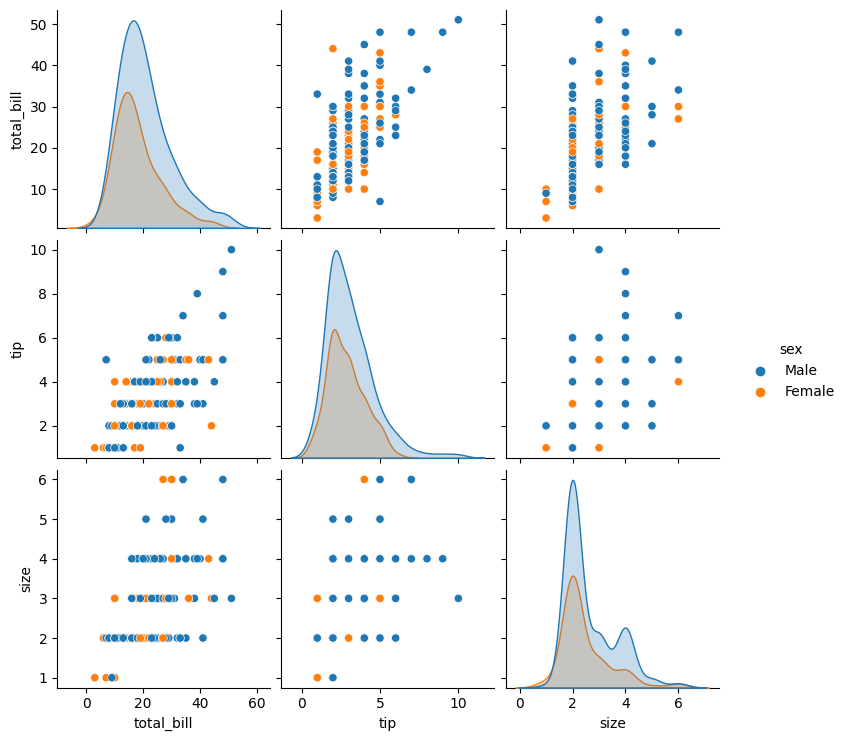

In [120]:
sns.pairplot(tips, hue= 'sex')